# Mini proyect: FIFA - MoneyBall


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Predecir el potencial de los jugadores

### 1. Lectura de datos

In [51]:
df = pd.read_csv('fifa21_male2.csv')
df

C:\Users\Daniel Castañeda\AppData\Local\Temp\ipykernel_25940\1728705404.py:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fifa21_male2.csv')


,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [52]:
df.shape

(17125, 107)

In [53]:
df.info(verbose=True, show_counts=True) 
# show_count = True.- to show the non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 107 columns):
 #    Column            Non-Null Count  Dtype  
---   ------            --------------  -----  
 0    ID                17125 non-null  int64  
 1    Name              17125 non-null  object 
 2    Age               17125 non-null  int64  
 3    OVA               17125 non-null  int64  
 4    Nationality       17125 non-null  object 
 5    Club              17102 non-null  object 
 6    BOV               17125 non-null  int64  
 7    BP                17125 non-null  object 
 8    Position          16712 non-null  object 
 9    Player Photo      17125 non-null  object 
 10   Club Logo         17102 non-null  object 
 11   Flag Photo        17125 non-null  object 
 12   POT               17125 non-null  int64  
 13   Team & Contract   17125 non-null  object 
 14   Height            17125 non-null  object 
 15   Weight            17125 non-null  object 
 16   foot              17

### 2. Limpieza de datos

#### - Estandarización 

In [54]:
# Se crea una lista vacía a la que, con una iteración se le agregarán los nombres de las columnas con la
# respectiva modificación, es decir, reemplazando espacios con guiones bajos y cambiando a minúsculas 
# todas las letras.
new_cols=[]
for col in df.columns:
    new_col = col.lower().replace(' ', '_')
    new_cols.append(new_col)
new_cols
df.columns = new_cols
df.head(3)

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male


In [55]:
pd.set_option('display.max_columns', None)
df.head(3)

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male


In [56]:
# Se eliminan las columnas que no tienen relevancia
df = df.drop(['name', 'id', 'hits', 'position', 'player_photo', 'club_logo', 'flag_photo', 'team_&_contract', 'joined', 'loan_date_end', 'contract', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'gender'], axis=1)
df.head(3)

,age,ova,nationality,club,bov,bp,pot,height,weight,foot,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy
0,33,69,Italy,Udinese,71,LWB,69,"6'0""",181lbs,Left,0,€625K,€7K,€0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69
1,37,71,Spain,KAS Eupen,70,CM,71,"5'10""",143lbs,Right,0,€600K,€7K,€1.1M,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63
2,33,71,England,Coventry City,71,CAM,71,"5'9""",161lbs,Right,0,€1.1M,€15K,€0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52


In [57]:
#Eliminar caractéres en columnas numéricas.

#Con el método .loc traigo un dataframe de las columnas que quiero modificar
select_col = df.loc[:,['weight', 'w/f', 'sm', 'ir']] 
#Con un for loop accedemos a cada columna individualmente para aplicar el método str.replace()
for x in select_col:
    df[x] = df[x].str.replace('★', '')  
    df[x] = df[x].str.replace('lbs', '')   
    df[x] = df[x].astype(int)
df.loc[:,['weight', 'w/f', 'sm', 'ir']].head(3)        

,weight,w/f,sm,ir
0,181,3,2,2
1,143,4,3,1
2,161,4,4,2


In [58]:
#Estandarizar a una sóla unidad de miles de euros

select_cols2 = ['value', 'wage', 'release_clause']
for x in select_cols2:
    df[x] = df[x].str.replace('€', '')
    df[x] = df[x].str.replace('K', '')
    mask = df[x].str.endswith('M')
    df.loc[mask, x] = df.loc[mask, x].str.replace('M', '')
    df.loc[mask, x] = df.loc[mask, x].astype(float) * 1000
    df[x] = df[x].astype(int)
    
df.loc[:, ['value', 'wage', 'release_clause']].head(10)

,value,wage,release_clause
0,625,7,0
1,600,7,1100
2,1100,15,0
3,0,0,0
4,5500,12,7200
5,725,5,0
6,2800,44,5300
7,1,60,0
8,0,0,0
9,400,40,0


In [59]:
#Estandarizar a una sóla unidad de medida para la altura de los jugadores

df[['feet', 'inches']] = df['height'].str.split("'", expand=True)
df['feet'] = df['feet'].astype(int)
df['inches'] = df['inches'].str.replace('"', '')
df['inches'] = df['inches'].astype(int)
df['height_cm'] = (df['feet'] * 30.48 + df['inches'] * 2.54)
df = df.drop(['feet', 'inches', 'height'], axis=1)
df.head()

,age,ova,nationality,club,bov,bp,pot,weight,foot,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,height_cm
0,33,69,Italy,Udinese,71,LWB,69,181,Left,0,625,7,0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3,2,Medium,High,2,71,59,70,71,68,69,182.88
1,37,71,Spain,KAS Eupen,70,CM,71,143,Right,0,600,7,1100,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4,3,Medium,Medium,1,53,69,73,69,58,63,177.80
2,33,71,England,Coventry City,71,CAM,71,161,Right,0,1100,15,0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4,4,Medium,Low,2,45,68,76,77,36,52,175.26
3,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,82,165,Right,14,0,0,0,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3,1,NaN,NaN,1,61,66,66,69,47,60,180.34
4,36,81,Spain,Vissel Kobe,82,CAM,81,150,Right,0,5500,12,7200,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4,4,High,Medium,4,58,70,85,85,63,59,170.18


#### - Revisión de nulos

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 68 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               17125 non-null  int64  
 1   ova               17125 non-null  int64  
 2   nationality       17125 non-null  object 
 3   club              17102 non-null  object 
 4   bov               17125 non-null  int64  
 5   bp                17125 non-null  object 
 6   pot               17125 non-null  int64  
 7   weight            17125 non-null  int32  
 8   foot              17125 non-null  object 
 9   growth            17125 non-null  int64  
 10  value             17125 non-null  int32  
 11  wage              17125 non-null  int32  
 12  release_clause    17125 non-null  int32  
 13  attacking         17125 non-null  int64  
 14  crossing          17125 non-null  int64  
 15  finishing         17125 non-null  int64  
 16  heading_accuracy  17125 non-null  int64 

In [61]:
valores_nulos = df.isnull().sum()
valores_nulos

age             0
ova             0
nationality     0
club           23
bov             0
               ..
pas             0
dri             0
def             0
phy             0
height_cm       0
Length: 68, dtype: int64

In [62]:
valores_nulos[valores_nulos > 0]

club               23
volleys            58
curve              58
agility            58
balance            58
jumping            58
interceptions       7
positioning         7
vision             58
composure         423
sliding_tackle     58
a/w                89
d/w                89
dtype: int64

In [63]:
porcentajes_nulos = valores_nulos/df.shape[0]
porcentajes_nulos

age            0.000000
ova            0.000000
nationality    0.000000
club           0.001343
bov            0.000000
                 ...   
pas            0.000000
dri            0.000000
def            0.000000
phy            0.000000
height_cm      0.000000
Length: 68, dtype: float64

In [64]:
porcentajes_nulos[porcentajes_nulos > 0]

club              0.001343
volleys           0.003387
curve             0.003387
agility           0.003387
balance           0.003387
jumping           0.003387
interceptions     0.000409
positioning       0.000409
vision            0.003387
composure         0.024701
sliding_tackle    0.003387
a/w               0.005197
d/w               0.005197
dtype: float64

In [65]:
columnas_con_nulos = porcentajes_nulos[porcentajes_nulos>0].index
columnas_con_nulos

Index(['club', 'volleys', 'curve', 'agility', 'balance', 'jumping',
       'interceptions', 'positioning', 'vision', 'composure', 'sliding_tackle',
       'a/w', 'd/w'],
      dtype='object')

In [66]:
df_small = df[columnas_con_nulos] 
df_small.head(3)

,club,volleys,curve,agility,balance,jumping,interceptions,positioning,vision,composure,sliding_tackle,a/w,d/w
0,Udinese,58.0,65.0,68.0,68.0,68.0,69.0,63.0,66.0,NaN,69.0,Medium,High
1,KAS Eupen,68.0,79.0,62.0,72.0,54.0,71.0,72.0,73.0,79.0,40.0,Medium,Medium
2,Coventry City,75.0,84.0,71.0,75.0,58.0,39.0,69.0,74.0,NaN,30.0,Medium,Low


#### - Relleno de nulos

In [67]:
for column in df.loc[:,['club', 'volleys', 'curve', 'agility', 'balance', 'jumping', 'interceptions', 'positioning', 'vision', 'composure', 'sliding_tackle', 'a/w', 'd/w']]:
    # Comprobar el tipo de dato de la columna
    if df[column].dtype == np.float64:
        # Rellenar los valores nulos con la media
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        # Rellenar los valores nulos con la moda
        df[column].fillna(df[column].mode().iloc[0], inplace=True)

In [68]:
# Corroborar el relleno de nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 68 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               17125 non-null  int64  
 1   ova               17125 non-null  int64  
 2   nationality       17125 non-null  object 
 3   club              17125 non-null  object 
 4   bov               17125 non-null  int64  
 5   bp                17125 non-null  object 
 6   pot               17125 non-null  int64  
 7   weight            17125 non-null  int32  
 8   foot              17125 non-null  object 
 9   growth            17125 non-null  int64  
 10  value             17125 non-null  int32  
 11  wage              17125 non-null  int32  
 12  release_clause    17125 non-null  int32  
 13  attacking         17125 non-null  int64  
 14  crossing          17125 non-null  int64  
 15  finishing         17125 non-null  int64  
 16  heading_accuracy  17125 non-null  int64 

In [69]:
df.head(3)

,age,ova,nationality,club,bov,bp,pot,weight,foot,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,height_cm
0,33,69,Italy,Udinese,71,LWB,69,181,Left,0,625,7,0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,59.940965,208,70,69,69.0,56,14,5,15,10,12,1929,408,3,2,Medium,High,2,71,59,70,71,68,69,182.88
1,37,71,Spain,KAS Eupen,70,CM,71,143,Right,0,600,7,1100,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.000000,153,70,43,40.0,56,9,12,13,11,11,1906,385,4,3,Medium,Medium,1,53,69,73,69,58,63,177.80
2,33,71,England,Coventry City,71,CAM,71,161,Right,0,1100,15,0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,59.940965,99,35,34,30.0,51,9,6,13,16,7,1770,354,4,4,Medium,Low,2,45,68,76,77,36,52,175.26


### 3. Procesamiento de datos

#### - Separación de columnas categóricas y numéricas

In [70]:
categorical_df = df[df.select_dtypes('object').columns] 
categorical_df

,nationality,club,bp,foot,a/w,d/w
0,Italy,Udinese,LWB,Left,Medium,High
1,Spain,KAS Eupen,CM,Right,Medium,Medium
2,England,Coventry City,CAM,Right,Medium,Low
3,Trinidad &amp; Tobago,Sunderland,ST,Right,Medium,Medium
4,Spain,Vissel Kobe,CAM,Right,High,Medium
...,...,...,...,...,...,...
17120,France,CD Tondela,CB,Right,Medium,Medium
17121,Wales,Burnley,CAM,Right,Medium,Medium
17122,England,Burnley,RB,Right,Medium,Medium
17123,Bosnia Herzegovina,SK Sturm Graz,RB,Right,High,Medium


In [71]:
numerical_df = df[df.select_dtypes('number').columns]
numerical_df

,age,ova,bov,pot,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,height_cm
0,33,69,71,69,181,0,625,7,0,313,75,50,59,71,58.000000,338,73,65.000000,60,69,71,347,68,74,68.000000,69,68.000000,347,74,68.000000,69,68,68,320,72,69.0,63.0,66.000000,50,59.940965,208,70,69,69.000000,56,14,5,15,10,12,1929,408,3,2,2,71,59,70,71,68,69,182.88
1,37,71,70,71,143,0,600,7,1100,337,68,64,61,76,68.000000,369,69,79.000000,79,71,71,305,56,50,62.000000,65,72.000000,324,75,54.000000,64,60,71,362,71,71.0,72.0,73.000000,75,79.000000,153,70,43,40.000000,56,9,12,13,11,11,1906,385,4,3,1,53,69,73,69,58,63,177.80
2,33,71,71,71,161,0,1100,15,0,337,80,64,41,77,75.000000,387,79,84.000000,77,69,78,295,48,42,71.000000,59,75.000000,284,72,58.000000,29,56,69,317,69,39.0,69.0,74.000000,66,59.940965,99,35,34,30.000000,51,9,6,13,16,7,1770,354,4,4,2,45,68,76,77,36,52,175.26
3,36,68,70,82,165,14,0,0,0,264,54,70,60,80,45.005742,255,68,49.574676,46,64,77,176,59,62,64.602273,55,64.715591,239,63,65.170212,51,66,59,271,59,70.0,72.0,55.443605,70,59.940965,75,34,41,46.099725,68,5,21,64,21,21,1348,369,3,1,1,61,66,66,69,47,60,180.34
4,36,81,82,81,150,0,5500,12,7200,367,75,69,54,90,79.000000,408,85,80.000000,70,83,90,346,61,56,79.000000,75,75.000000,297,67,40.000000,58,62,70,370,58,70.0,78.0,93.000000,71,89.000000,181,68,57,56.000000,45,6,13,6,13,7,2014,420,4,4,4,58,70,85,85,63,59,170.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,22,64,66,69,165,5,550,2,0,197,35,23,66,47,26.000000,193,44,26.000000,33,34,56,243,52,55,46.000000,48,42.000000,279,48,70.000000,59,74,28,218,69,58.0,23.0,29.000000,39,46.000000,198,61,71,66.000000,39,11,8,8,5,7,1367,302,2,2,1,54,30,37,48,64,69,198.12
17121,18,56,58,66,170,10,130,3,273,248,50,43,50,64,41.000000,264,57,42.000000,50,61,54,298,61,63,52.000000,54,68.000000,271,51,62.000000,53,57,48,259,51,50.0,55.0,53.000000,50,46.000000,132,34,42,56.000000,57,12,15,7,12,11,1529,319,3,2,1,62,46,57,56,43,55,177.80
17122,18,56,56,67,154,11,130,2,273,218,55,34,53,42,34.000000,212,52,43.000000,34,36,47,308,66,61,54.000000,59,68.000000,233,28,61.000000,53,54,37,256,58,55.0,49.0,45.000000,49,43.000000,163,55,54,54.000000,40,8,7,5,12,8,1430,303,3,2,1,63,35,44,52,54,55,175.26
17123,20,62,62,73,148,11,475,3,784,223,62,26,52,60,23.000000,258,55,43.000000,46,57,57,349,72,70,74.000000,56,77.000000,261,51,72.000000,57,48,33,257,61,58.0,46.0,56.000000,36,54.000000,180,57,62,61.000000,51,15,13,8,6,9,1579,335,4,2,1,71,34,58,59,59,54,175.26


<Axes: >

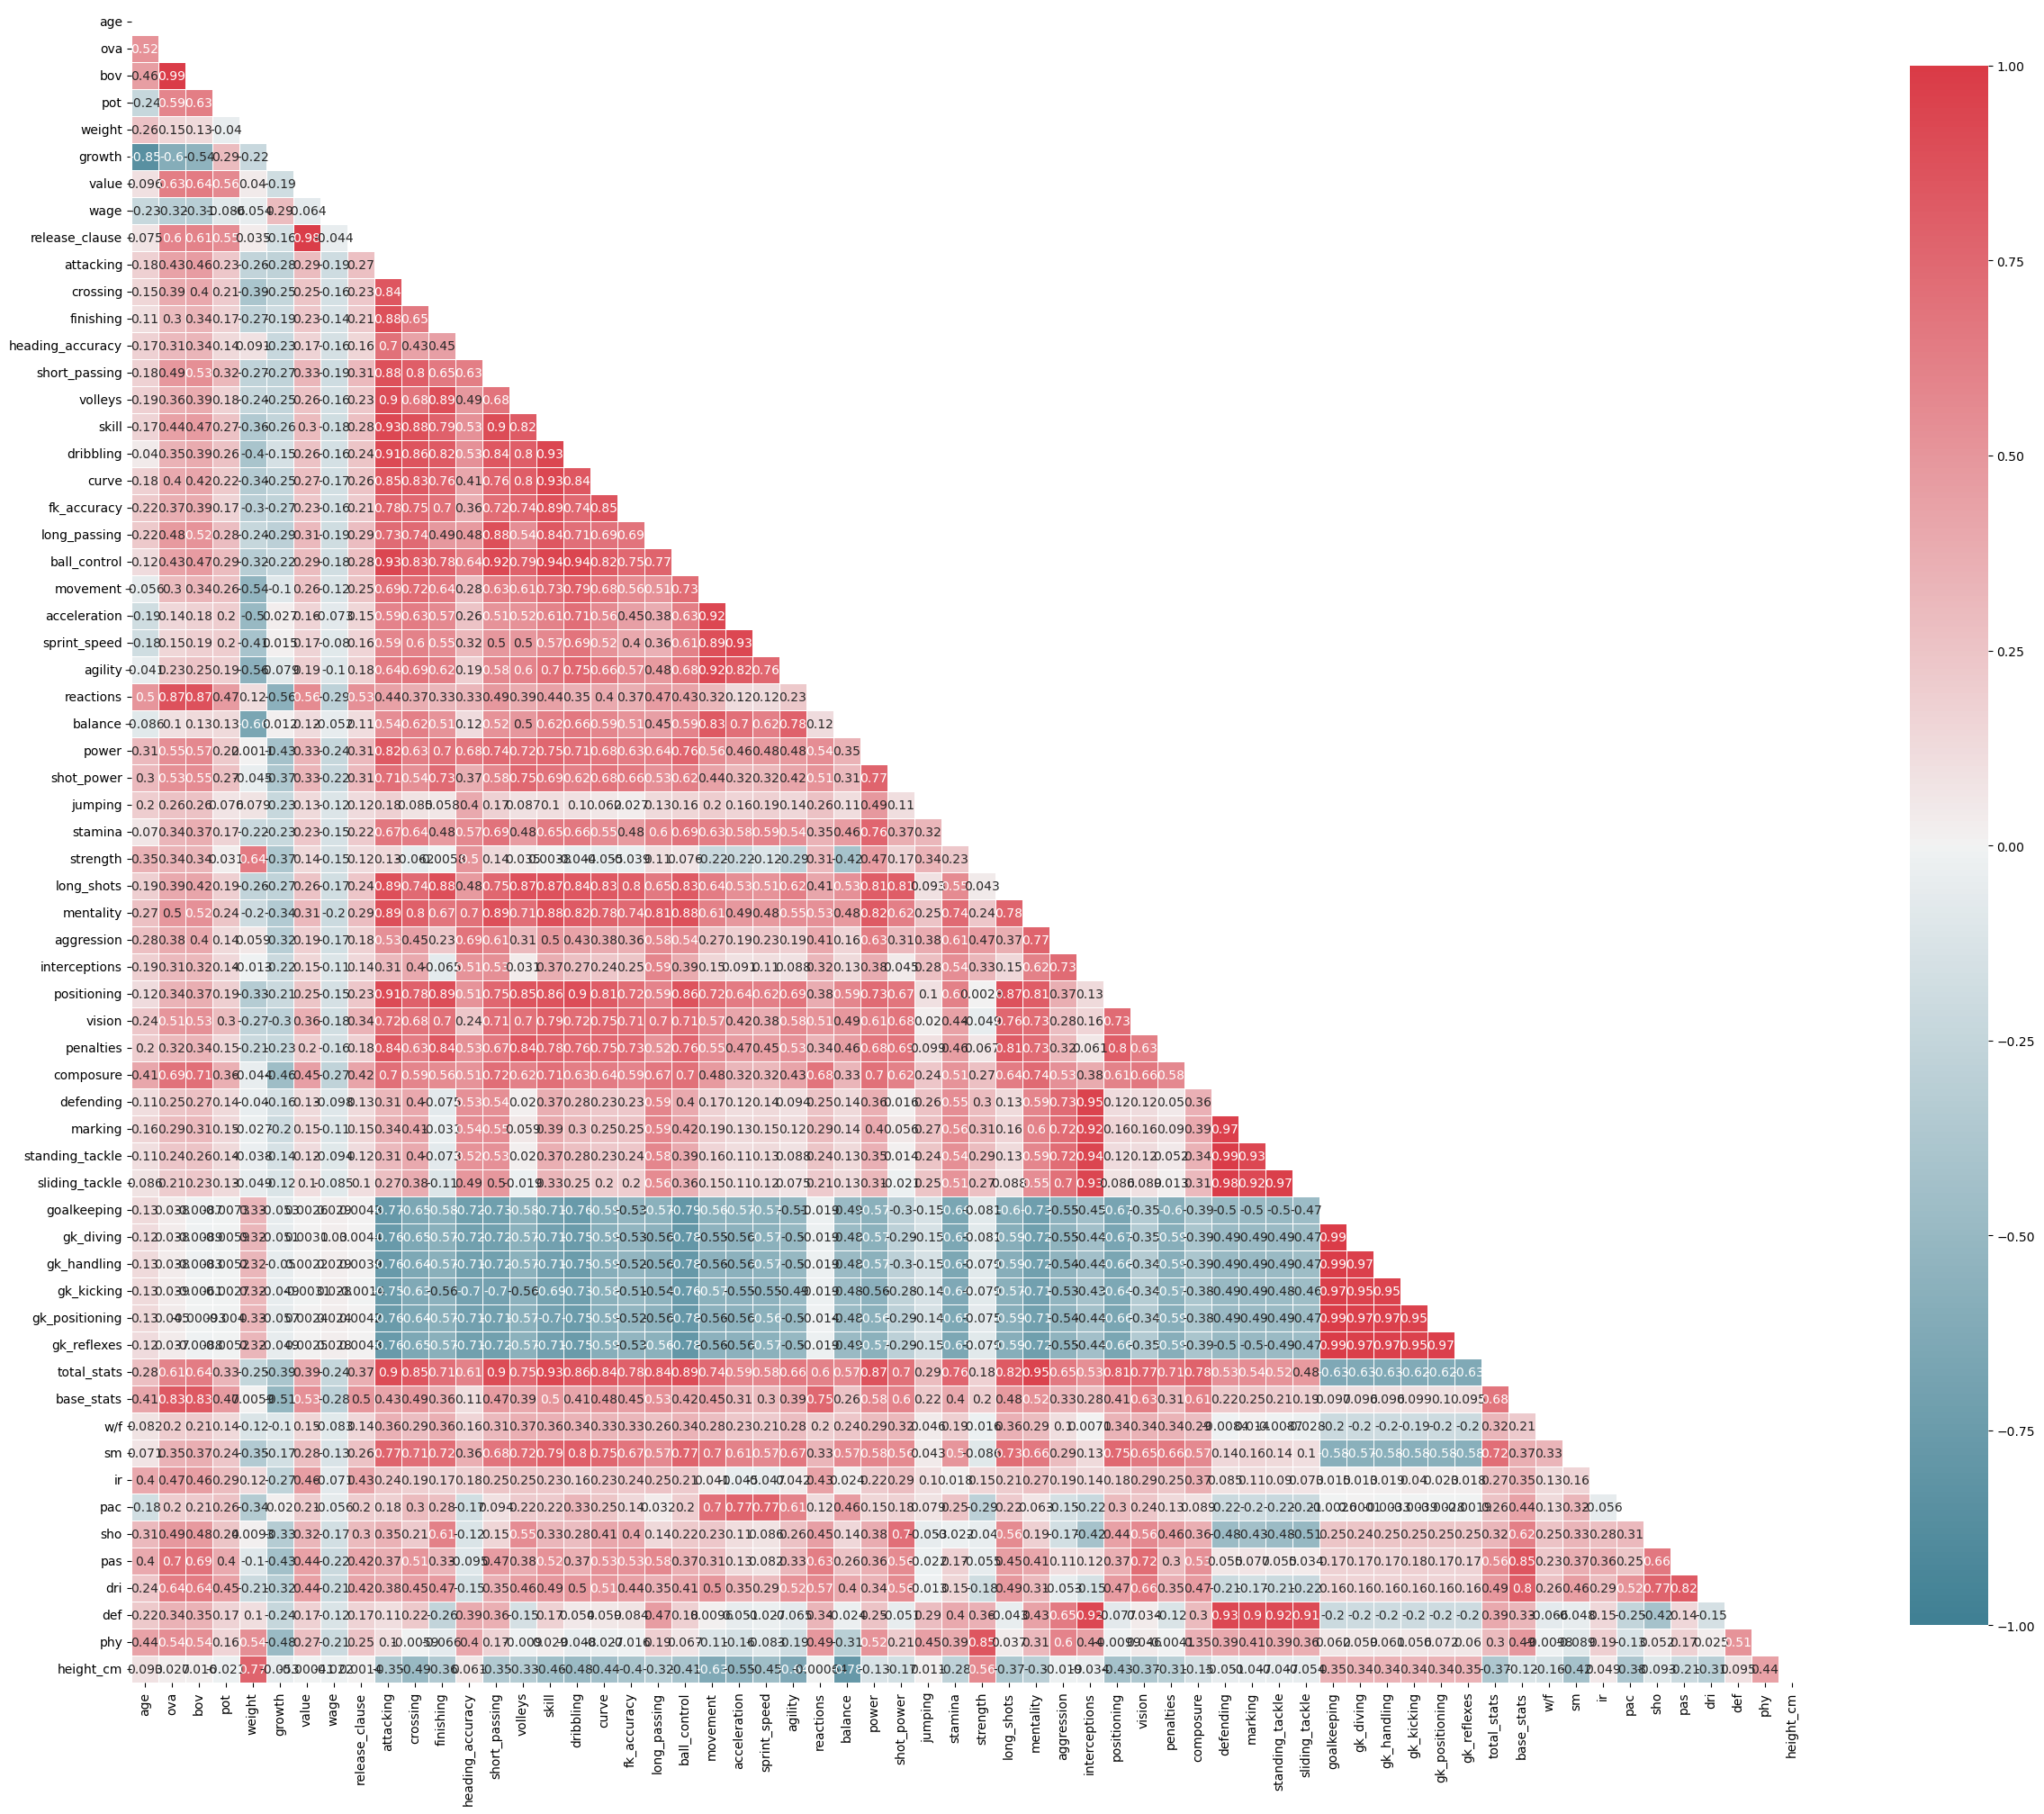

In [419]:
corr = df.select_dtypes(np.number).corr()
mask = np.triu(np.ones_like(corr, dtype = bool))                                 # generate a mask for the upper triangle
cmap = sns.diverging_palette(2020, 10, as_cmap = True)                           # generate a custom diverging colormap
plt.figure(figsize = (30, 30))                                                     # set up the matplotlib figure
sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -1, vmax = 1, annot = True,
            square = True, linewidths = 0.5, cbar_kws = {'shrink' : 0.75})

In [73]:
df.describe()

,age,ova,bov,pot,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,height_cm
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,25.272934,66.965022,67.900204,72.489810,165.658861,5.524788,2567.377168,106.401927,4574.445139,258.537752,51.621314,47.956672,53.598832,60.507620,45.005742,266.607591,57.846423,49.574676,44.387270,54.324321,60.642803,322.693664,65.445898,65.443036,64.602273,62.924847,64.715591,302.414774,59.711416,65.170212,63.309606,65.308555,49.135708,261.922803,56.997839,47.085582,52.372766,55.443605,50.251445,59.940965,141.469898,47.246949,48.279358,46.099725,77.609693,15.600467,15.484672,15.472058,15.514277,15.738628,1631.256175,361.372146,2.985927,2.452496,1.152234,68.091620,54.967299,58.926540,64.209869,50.266102,64.910715,181.222956
std,4.942665,6.864329,6.637538,5.769949,15.818185,5.787539,5372.622458,223.103101,10338.461857,72.255687,17.875715,19.391547,16.947164,13.960635,17.699432,76.809344,18.047250,18.157516,17.504128,14.856911,15.873647,54.933593,14.657889,14.437377,14.348082,9.037279,14.007780,49.380576,13.417931,11.897862,15.313272,12.627212,19.044862,62.913935,17.021619,20.842444,19.090529,13.706808,15.696363,11.605064,61.595180,20.182548,21.483597,21.149246,81.136603,16.828637,16.143679,15.997328,16.406064,17.130908,260.357024,40.252290,0.672551,0.781285,0.461311,11.147116,13.877605,10.186728,9.832734,16.853801,9.660260,6.886553
min,16.000000,38.000000,42.000000,47.000000,110.000000,-1.000000,0.000000,0.000000,0.000000,33.000000,6.000000,3.000000,5.000000,7.000000,4.000000,43.000000,5.000000,4.000000,5.000000,9.000000,5.000000,113.000000,12.000000,11.000000,14.000000,24.000000,17.000000,128.000000,12.000000,22.000000,11.000000,16.000000,4.000000,50.000000,9.000000,4.000000,2.000000,10.000000,7.000000,12.000000,17.000000,3.000000,5.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,731.000000,228.000000,1.000000,1.000000,1.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000,154.940000
25%,21.000000,62.000000,64.000000,69.000000,154.000000,0.000000,375.000000,3.000000,508.000000,232.000000,41.000000,33.000000,46.000000,56.000000,32.000000,232.000000,53.000000,37.000000,32.000000,45.000000,57.000000,294.000000,58.000000,59.000000,57.000000,57.000000,57.000000,272.000000,50.000000,58.000000,56.000000,58.000000,35.000000,235.000000,45.000000,26.000000,43.000000,47.000000,40.000000,53.000000,84.000000,29.000000,28.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1492.000000,333.000000,3.000000,2.000000,1.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000,175.260000
50%,25.000000,67.000000,68.000000,72.000000,165.000000,4.000000,800.000000,7.000000,1300.000000,271.000000,56.000000,52.000000,57.000000,63.00000

#### - Revisión de valores atípicos

<Axes: xlabel='pot'>

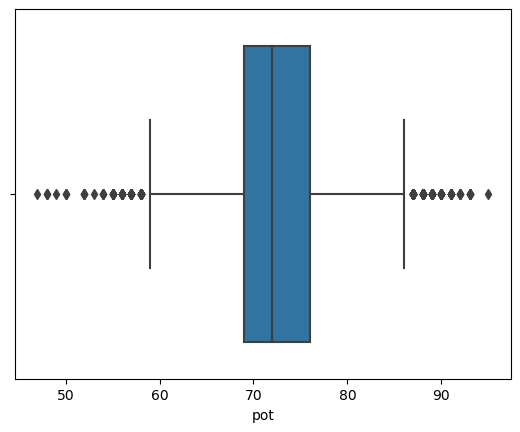

In [74]:
sns.boxplot(x=numerical_df['pot'])

In [75]:
q1=np.percentile(numerical_df['pot'], 25)   # percentile 25
q3=np.percentile(numerical_df['pot'], 75)   # percentile 75
iqr=q3-q1 

upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

iqr, upper_limit, lower_limit

(7.0, 86.5, 58.5)

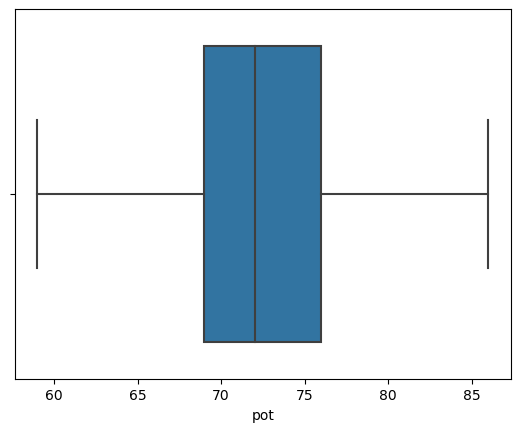

In [76]:
data = numerical_df[(numerical_df['pot']>lower_limit) & (numerical_df['pot']<upper_limit)]
sns.boxplot(x=data['pot'])
plt.show()

<Axes: xlabel='pot', ylabel='Count'>

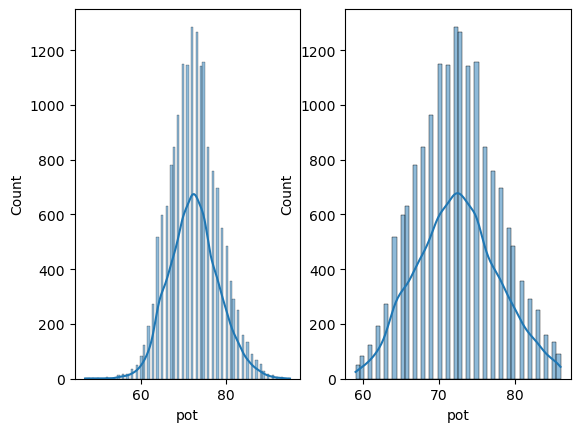

In [77]:
plt.subplot(1,2,1)
sns.histplot(numerical_df['pot'], kde=True)

plt.subplot(1,2,2)
sns.histplot(data['pot'], kde=True)

#### - Separación de valores de entrenamiento y prueba

In [78]:
y = numerical_df['pot']
y

0        69
1        71
2        71
3        82
4        81
         ..
17120    69
17121    66
17122    67
17123    73
17124    74
Name: pot, Length: 17125, dtype: int64

In [79]:
x = numerical_df.drop(['pot'], axis=1)
x

,age,ova,bov,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,height_cm
0,33,69,71,181,0,625,7,0,313,75,50,59,71,58.000000,338,73,65.000000,60,69,71,347,68,74,68.000000,69,68.000000,347,74,68.000000,69,68,68,320,72,69.0,63.0,66.000000,50,59.940965,208,70,69,69.000000,56,14,5,15,10,12,1929,408,3,2,2,71,59,70,71,68,69,182.88
1,37,71,70,143,0,600,7,1100,337,68,64,61,76,68.000000,369,69,79.000000,79,71,71,305,56,50,62.000000,65,72.000000,324,75,54.000000,64,60,71,362,71,71.0,72.0,73.000000,75,79.000000,153,70,43,40.000000,56,9,12,13,11,11,1906,385,4,3,1,53,69,73,69,58,63,177.80
2,33,71,71,161,0,1100,15,0,337,80,64,41,77,75.000000,387,79,84.000000,77,69,78,295,48,42,71.000000,59,75.000000,284,72,58.000000,29,56,69,317,69,39.0,69.0,74.000000,66,59.940965,99,35,34,30.000000,51,9,6,13,16,7,1770,354,4,4,2,45,68,76,77,36,52,175.26
3,36,68,70,165,14,0,0,0,264,54,70,60,80,45.005742,255,68,49.574676,46,64,77,176,59,62,64.602273,55,64.715591,239,63,65.170212,51,66,59,271,59,70.0,72.0,55.443605,70,59.940965,75,34,41,46.099725,68,5,21,64,21,21,1348,369,3,1,1,61,66,66,69,47,60,180.34
4,36,81,82,150,0,5500,12,7200,367,75,69,54,90,79.000000,408,85,80.000000,70,83,90,346,61,56,79.000000,75,75.000000,297,67,40.000000,58,62,70,370,58,70.0,78.0,93.000000,71,89.000000,181,68,57,56.000000,45,6,13,6,13,7,2014,420,4,4,4,58,70,85,85,63,59,170.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,22,64,66,165,5,550,2,0,197,35,23,66,47,26.000000,193,44,26.000000,33,34,56,243,52,55,46.000000,48,42.000000,279,48,70.000000,59,74,28,218,69,58.0,23.0,29.000000,39,46.000000,198,61,71,66.000000,39,11,8,8,5,7,1367,302,2,2,1,54,30,37,48,64,69,198.12
17121,18,56,58,170,10,130,3,273,248,50,43,50,64,41.000000,264,57,42.000000,50,61,54,298,61,63,52.000000,54,68.000000,271,51,62.000000,53,57,48,259,51,50.0,55.0,53.000000,50,46.000000,132,34,42,56.000000,57,12,15,7,12,11,1529,319,3,2,1,62,46,57,56,43,55,177.80
17122,18,56,56,154,11,130,2,273,218,55,34,53,42,34.000000,212,52,43.000000,34,36,47,308,66,61,54.000000,59,68.000000,233,28,61.000000,53,54,37,256,58,55.0,49.0,45.000000,49,43.000000,163,55,54,54.000000,40,8,7,5,12,8,1430,303,3,2,1,63,35,44,52,54,55,175.26
17123,20,62,62,148,11,475,3,784,223,62,26,52,60,23.000000,258,55,43.000000,46,57,57,349,72,70,74.000000,56,77.000000,261,51,72.000000,57,48,33,257,61,58.0,46.0,56.000000,36,54.000000,180,57,62,61.000000,51,15,13,8,6,9,1579,335,4,2,1,71,34,58,59,59,54,175.26


In [80]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [81]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(17125, 61)
(12843, 61)
(4282, 61)
(17125,)
(12843,)
(4282,)


In [82]:
categorical_df

,nationality,club,bp,foot,a/w,d/w
0,Italy,Udinese,LWB,Left,Medium,High
1,Spain,KAS Eupen,CM,Right,Medium,Medium
2,England,Coventry City,CAM,Right,Medium,Low
3,Trinidad &amp; Tobago,Sunderland,ST,Right,Medium,Medium
4,Spain,Vissel Kobe,CAM,Right,High,Medium
...,...,...,...,...,...,...
17120,France,CD Tondela,CB,Right,Medium,Medium
17121,Wales,Burnley,CAM,Right,Medium,Medium
17122,England,Burnley,RB,Right,Medium,Medium
17123,Bosnia Herzegovina,SK Sturm Graz,RB,Right,High,Medium


#### - Codificar las columnas categóricas

In [83]:
no_label = categorical_df.drop(['a/w','d/w'], axis=1)
no_label

,nationality,club,bp,foot
0,Italy,Udinese,LWB,Left
1,Spain,KAS Eupen,CM,Right
2,England,Coventry City,CAM,Right
3,Trinidad &amp; Tobago,Sunderland,ST,Right
4,Spain,Vissel Kobe,CAM,Right
...,...,...,...,...
17120,France,CD Tondela,CB,Right
17121,Wales,Burnley,CAM,Right
17122,England,Burnley,RB,Right
17123,Bosnia Herzegovina,SK Sturm Graz,RB,Right


In [84]:
one_hot_df = pd.get_dummies(no_label, drop_first=True)
one_hot_df

nationality_Albania  nationality_Algeria  nationality_Andorra  \
0                        0                    0                    0   
1                        0                    0                    0   
2                        0                    0                    0   
3                        0                    0                    0   
4                        0                    0                    0   
...                    ...                  ...                  ...   
17120                    0                    0                    0   
17121                    0                    0                    0   
17122                    0                    0                    0   
17123                    0                    0                    0   
17124                    0                    0                    0   

       nationality_Angola  nationality_Antigua &amp; Barbuda  \
0                       0                                  0   
1                       0                                  0   
2                       0                                  0   
3                       0                                  0   
4                       0                                  0   
...                   ...                                ...   
17120                   0                                  0   
17121                   0                                  0   
17122                   0                                  0   
17123                   0                                  0   
17124                   0                                  0   

       nationality_Argentina  nationality_Armenia  nationality_Aruba  \
0                          0                    0                  0   
1                          0                    0                  0   
2                          0                    0                  0   
3                          0                    0                  0   
4                          0                    0                  0   
...                      ...                  ...                ...   
17120                      0                    0                  0   
17121                      0                    0                  0   
17122                      0                    0                  0   
17123                      0                    0                  0   
17124                      0                    0                  0   

       nationality_Australia  nationality_Austria  nationality_Azerbaijan  \
0                          0                    0                       0   
1                          0                    0                       0   
2                          0                    0                       0   
3                          0                    0                       0   
4                          0                    0                       0   
...                      ...                  ...                     ...   
17120                      0                    0                       0   
17121                      0                    0                       0   
17122                      0                    0                       0   
17123                      0                    0                       0   
17124                      0                    0                       0   

       nationality_Barbados  nationality_Belarus  nationality_Belgium  \
0                         0                    0                    0   
1                         0                    0                    0   
2                         0                    0                    0   
3                         0                    0                    0   
4                         0                    0                    0   
...                     ...                  ...                  ...   
17120                     0                    0                    0   

In [264]:
label_col = categorical_df.loc[:,['a/w','d/w']]
label_col.head()

,a/w,d/w
0,Medium,High
1,Medium,Medium
2,Medium,Low
3,Medium,Medium
4,High,Medium


In [86]:
print(df['a/w'].unique())
print('-----------')
print(df['d/w'].unique())

['Medium' 'High' 'Low']
-----------
['High' 'Medium' 'Low']


In [324]:
from category_encoders import OrdinalEncoder 

maplist = [{'col': 'a/w', 'mapping': {'Low': 0, 'Medium': 1,'High': 2}}]
oe = OrdinalEncoder(mapping=maplist)
oe_aw = oe.fit_transform(df['a/w'])
oe_aw = pd.DataFrame(oe_aw, columns=['a/w'])
oe_aw.head()

,a/w
0,1
1,1
2,1
3,1
4,2


In [325]:
maplist = [{'col': 'd/w', 'mapping': {'Low': 0, 'Medium': 1,'High': 2}}]
oe = OrdinalEncoder(mapping=maplist)
oe_dw = oe.fit_transform(df['d/w'])
oe_dw = pd.DataFrame(oe_dw, columns=['d/w'])
oe_dw.head()

,d/w
0,2
1,1
2,0
3,1
4,1


In [327]:
print(label_col['a/w'].value_counts())
print('-----------')
print(label_col['d/w'].value_counts())

Medium    11133
High       5143
Low         849
Name: a/w, dtype: int64
-----------
Medium    12314
High       3017
Low        1794
Name: d/w, dtype: int64


<Axes: >

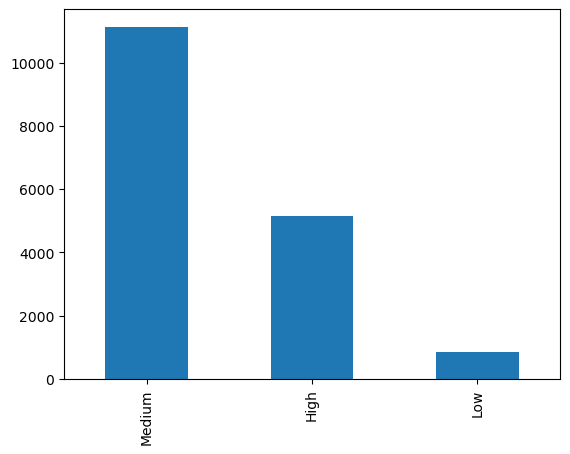

In [328]:
label_col['a/w'].value_counts().plot(kind='bar')

<Axes: >

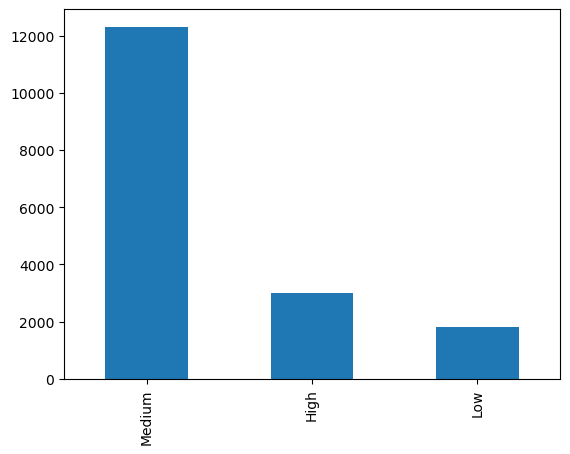

In [329]:
label_col['d/w'].value_counts().plot(kind='bar')

### 5. Modelo

In [93]:
from sklearn.linear_model import LinearRegression as LinReg
linreg=LinReg()    

linreg=LinReg()               
linreg.fit(x_train, y_train)  
y_pred_train = linreg.predict(x_train)
y_pred_test=linreg.predict(x_test) 

In [94]:
train_score = linreg.score(x_train, y_train) 
train_score

1.0

In [95]:
test_score = linreg.score(x_test, y_test)    
test_score

1.0

## Predecir la edad de los jugadores

<Axes: xlabel='age'>

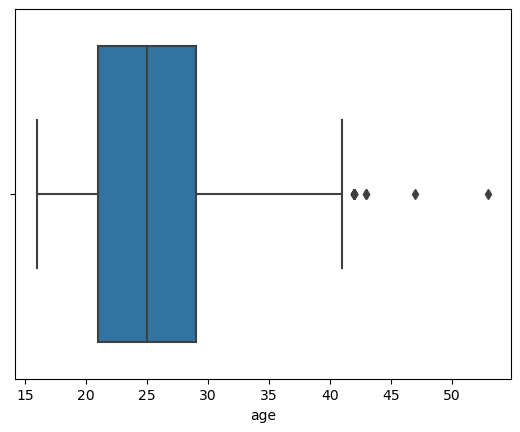

In [166]:
sns.boxplot(x=numerical_df['age'])

<Axes: xlabel='age', ylabel='Count'>

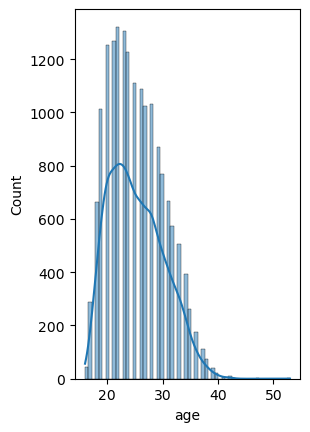

In [167]:
plt.subplot(1,2,1)
sns.histplot(numerical_df['age'], kde=True)

In [191]:
y1 = numerical_df['age']
y1

0        33
1        37
2        33
3        36
4        36
         ..
17120    22
17121    18
17122    18
17123    20
17124    18
Name: age, Length: 17125, dtype: int64

In [192]:
x1 = numerical_df.drop(['age'], axis=1)
x1

,ova,bov,pot,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,height_cm
0,69,71,69,181,0,625,7,0,313,75,50,59,71,58.000000,338,73,65.000000,60,69,71,347,68,74,68.000000,69,68.000000,347,74,68.000000,69,68,68,320,72,69.0,63.0,66.000000,50,59.940965,208,70,69,69.000000,56,14,5,15,10,12,1929,408,3,2,2,71,59,70,71,68,69,182.88
1,71,70,71,143,0,600,7,1100,337,68,64,61,76,68.000000,369,69,79.000000,79,71,71,305,56,50,62.000000,65,72.000000,324,75,54.000000,64,60,71,362,71,71.0,72.0,73.000000,75,79.000000,153,70,43,40.000000,56,9,12,13,11,11,1906,385,4,3,1,53,69,73,69,58,63,177.80
2,71,71,71,161,0,1100,15,0,337,80,64,41,77,75.000000,387,79,84.000000,77,69,78,295,48,42,71.000000,59,75.000000,284,72,58.000000,29,56,69,317,69,39.0,69.0,74.000000,66,59.940965,99,35,34,30.000000,51,9,6,13,16,7,1770,354,4,4,2,45,68,76,77,36,52,175.26
3,68,70,82,165,14,0,0,0,264,54,70,60,80,45.005742,255,68,49.574676,46,64,77,176,59,62,64.602273,55,64.715591,239,63,65.170212,51,66,59,271,59,70.0,72.0,55.443605,70,59.940965,75,34,41,46.099725,68,5,21,64,21,21,1348,369,3,1,1,61,66,66,69,47,60,180.34
4,81,82,81,150,0,5500,12,7200,367,75,69,54,90,79.000000,408,85,80.000000,70,83,90,346,61,56,79.000000,75,75.000000,297,67,40.000000,58,62,70,370,58,70.0,78.0,93.000000,71,89.000000,181,68,57,56.000000,45,6,13,6,13,7,2014,420,4,4,4,58,70,85,85,63,59,170.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,64,66,69,165,5,550,2,0,197,35,23,66,47,26.000000,193,44,26.000000,33,34,56,243,52,55,46.000000,48,42.000000,279,48,70.000000,59,74,28,218,69,58.0,23.0,29.000000,39,46.000000,198,61,71,66.000000,39,11,8,8,5,7,1367,302,2,2,1,54,30,37,48,64,69,198.12
17121,56,58,66,170,10,130,3,273,248,50,43,50,64,41.000000,264,57,42.000000,50,61,54,298,61,63,52.000000,54,68.000000,271,51,62.000000,53,57,48,259,51,50.0,55.0,53.000000,50,46.000000,132,34,42,56.000000,57,12,15,7,12,11,1529,319,3,2,1,62,46,57,56,43,55,177.80
17122,56,56,67,154,11,130,2,273,218,55,34,53,42,34.000000,212,52,43.000000,34,36,47,308,66,61,54.000000,59,68.000000,233,28,61.000000,53,54,37,256,58,55.0,49.0,45.000000,49,43.000000,163,55,54,54.000000,40,8,7,5,12,8,1430,303,3,2,1,63,35,44,52,54,55,175.26
17123,62,62,73,148,11,475,3,784,223,62,26,52,60,23.000000,258,55,43.000000,46,57,57,349,72,70,74.000000,56,77.000000,261,51,72.000000,57,48,33,257,61,58.0,46.0,56.000000,36,54.000000,180,57,62,61.000000,51,15,13,8,6,9,1579,335,4,2,1,71,34,58,59,59,54,175.26


In [281]:
from sklearn.model_selection import train_test_split
x1_train , x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

In [282]:
from sklearn.linear_model import LinearRegression as LinReg
linreg=LinReg()    

linreg=LinReg()               
linreg.fit(x1_train, y1_train)  
y1_pred_train = linreg.predict(x1_train)
y1_pred_test=linreg.predict(x1_test) 

In [283]:
train_score = linreg.score(x1_train, y1_train) 
train_score

0.8257604511163785

In [284]:
test_score = linreg.score(x1_test, y1_test)    
test_score

0.813063738618966

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [392]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
pt.fit(numerical_df)
num_pt_df = pt.transform(numerical_df)
num_pt_df = pd.DataFrame(num_pt_df, columns=numerical_df.columns)
num_pt_df.head(3)

,age,ova,bov,pot,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,height_cm
0,1.451125,0.298475,0.469357,-0.591345,0.975981,-1.212645,-0.279399,-0.110004,-1.983629,0.805461,1.476574,0.058046,0.235747,0.810620,0.731322,1.006672,0.973390,0.853786,0.893187,1.043337,0.701589,0.372587,0.059601,0.562199,0.144969,0.662331,0.149489,0.921456,1.103136,0.177067,0.288699,0.150061,1.030412,1.007775,0.895541,1.049753,0.528550,0.764049,-0.070003,-0.073802,1.081622,1.140283,0.969301,1.078216,0.049476,0.559911,-2.117727,0.662536,-0.115046,0.269499,1.246765,1.160237,0.048352,-0.557122,2.757894,0.192585,0.225166,1.103043,0.672697,1.055034,0.370004,0.242570
1,1.994596,0.589213,0.319096,-0.238194,-1.488545,-1.212645,-0.303480,-0.110004,-0.116817,1.294765,0.966294,0.832759,0.378609,1.371246,1.318628,1.568909,0.632942,1.709844,1.888668,1.214905,0.701589,-0.463904,-0.783393,-1.153593,-0.303327,0.207943,0.473621,0.380631,1.190770,-0.976441,-0.090699,-0.493810,1.217218,1.990121,0.827430,1.144869,1.142286,1.351880,1.682438,1.817730,0.184592,1.140283,-0.263577,-0.278039,0.049476,-0.347726,0.258467,0.411821,0.091768,0.093648,1.131344,0.584502,1.476526,0.714055,-0.362503,-1.339027,1.048375,1.425366,0.438953,0.453800,-0.281507,-0.495469
2,1.451125,0.589213,0.469357,-0.238194,-0.255893,-1.212645,0.067707,0.344916,-1.983629,1.294765,1.858159,0.832759,-0.889746,1.490156,1.734259,1.913714,1.523804,2.023973,1.785949,1.043337,1.452784,-0.640256,-1.245501,-1.559739,0.384003,-0.456300,0.727717,-0.465475,0.929984,-0.667479,-1.911724,-0.793628,1.092372,0.942504,0.692577,-0.383570,0.932235,1.438235,1.026261,-0.073802,-0.692187,-0.626446,-0.680148,-0.753415,-0.231719,-0.347726,-1.505750,0.411821,0.775621,-1.020674,0.485682,-0.187350,1.476526,1.904370,2.757894,-1.877919,0.962454,1.753217,1.419743,-0.851066,-1.314332,-0.865349


In [414]:
print(num_pt_df.shape)
print(one_hot_df.shape)
print(oe_aw.shape)
print(oe_dw.shape)

(17125, 62)
(17125, 1097)
(17125, 1)
(17125, 1)


In [400]:
concat_df = pd.concat([num_pt_df,one_hot_df], axis=1)
concat_df.head(3)

,age,ova,bov,pot,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,height_cm,nationality_Albania,nationality_Algeria,nationality_Andorra,nationality_Angola,nationality_Antigua &amp; Barbuda,nationality_Argentina,nationality_Armenia,nationality_Aruba,nationality_Australia,nationality_Austria,nationality_Azerbaijan,nationality_Barbados,nationality_Belarus,nationality_Belgium,nationality_Belize,nationality_Benin,nationality_Bermuda,nationality_Bolivia,nationality_Bosnia Herzegovina,nationality_Brazil,nationality_Brunei Darussalam,nationality_Bulgaria,nationality_Burkina Faso,nationality_Burundi,nationality_Cameroon,nationality_Canada,nationality_Cape Verde,nationality_Central African Republic,nationality_Chad,nationality_Chile,nationality_China PR,nationality_Chinese Taipei,nationality_Colombia,nationality_Comoros,nationality_Congo,nationality_Costa Rica,nationality_Croatia,nationality_Cuba,nationality_Curacao,nationality_Cyprus,nationality_Czech Republic,nationality_DR Congo,nationality_Denmark,nationality_Dominican Republic,nationality_Ecuador,nationality_Egypt,nationality_El Salvador,nationality_England,nationality_Equatorial Guinea,nationality_Eritrea,nationality_Estonia,nationality_Faroe Islands,nationality_Finland,nationality_France,nationality_Gabon,nationality_Gambia,nationality_Georgia,nationality_Germany,nationality_Ghana,nationality_Gibraltar,nationality_Greece,nationality_Grenada,nationality_Guam,nationality_Guinea,nationality_Guinea Bissau,nationality_Guyana,nationality_Haiti,nationality_Honduras,nationality_Hong Kong,nationality_Hungary,nationality_Iceland,nationality_India,nationality_Indonesia,nationality_Iran,nationality_Iraq,nationality_Israel,nationality_Italy,nationality_Ivory Coast,nationality_Jamaica,nationality_Japan,nationality_Jordan,nationality_Kazakhstan,nationality_Kenya,nationality_Korea DPR,nationality_Korea Republic,nationality_Kosovo,nationality_Latvia,nationality_Lebanon,nationality_Liberia,nationality_Libya,nationality_Liechtenstein,nationality_Lithuania,nationality_Luxembourg,nationality_Macau,nationality_Madagascar,nationality_Malawi,nationality_Malaysia,nationality_Mali,nationality_Malta,nationality_Mauritania,nationality_Mexico,nationality_Moldova,nationality_Montenegro,nationality_Montserrat,nationality_Morocco,nationality_Mozambique,nationality_Namibia,nationality_Netherlands,nationality_New Caledonia,nationality_New Zealand,nationality_Nicaragua,nationality_Niger,nationality_Nigeria,nationality_North Macedonia,nationality_Northern Ireland,nationality_Norway,nationality_Palestine,nationality_Panama,nationality_Papua New Guinea,nationality_Paraguay,nationality_Peru,nationality_Philippines,nationality_Poland,nationality_Portugal,nationality_Puerto Rico,nationality_Qatar,nationality_Republic of Ireland,nationality_Romania,nationality_Russia,nationality_Rwanda,nationality_Saint Kitts and Nevis,nationality_Saint Lucia,nationality_Saudi Arabia,nationality_Scotland,nationality_Senegal,nationality_Serbia,nationality_Sierra Leone,nationality_Singapore,nationality_Slovakia,nationality_Slovenia,nationality_South Africa,nationality_South Sudan,nationality_Spain,nationality_Sudan,nationality_Suriname,nationality_Sweden,nationality_Switzerland,nationality_Syria,nationality_São Tomé &amp; Príncipe,nationality_Tanzania,nationality_Thailand,nationality_Togo,nationality_Trinidad &amp; Tobago,nationality_Tunisia,nationality_Turkey,nationality_Uganda,nationality_Ukraine,nationality_United Arab Emirates,nationality_United States,nationa

In [401]:
#xc: x_concatenated 
#yc: y_concatenated 

yc=concat_df['age']
xc=concat_df.drop(['age'], axis=1)

In [415]:
xc_train, xc_test, yc_train, yc_test = train_test_split(xc, yc, test_size=0.25, random_state=42)

In [416]:
linregt=LinReg()
linregt.fit(xc_train, yc_train)
yc_pred_train = linregt.predict(xc_train)

In [417]:
train_score_t = linregt.score(xc_train, yc_train)
train_score_t

0.9229002028009317

In [418]:
yc_pred_test = linregt.predict(xc_test)
test_score_t = linregt.score(xc_test, yc_test)
test_score_t

-4.1975440727424983e+18